In [ ]:
from keras.models import Model
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dropout, Activation
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
#Extract zipped image
from zipfile import ZipFile
filename="data_crop.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Aug  9 20:40:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# face detection with mtcnn
!pip install mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract face from a given image
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
 
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract face and return image
	face = pixels[y1:y2, x1:x2]
	
	image = Image.fromarray(face)
	image = image.resize(required_size)
	return image 

     |████████████████████████████████| 2.3MB 3.5MB/s 


In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.2.0

#!pip uninstall keras -y
#!pip install -Iv keras==2.3.0

In [ ]:

import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)


def _get_available_gpus():
    #Get a list of available gpu devices (formatted as strings).

    # Returns
    #A list of available GPU devices.
    
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from keras import backend as K
K.set_image_data_format('channels_first')

def vgg_face(weights_path=None):
    img = Input(shape=(3, 224, 224))

    pad1_1 = ZeroPadding2D(padding=(1, 1))(img)
    conv1_1 = Convolution2D(64, 3, 3, activation='relu', name='conv1_1')(pad1_1)
    pad1_2 = ZeroPadding2D(padding=(1, 1))(conv1_1)
    conv1_2 = Convolution2D(64, 3, 3, activation='relu', name='conv1_2')(pad1_2)
    pool1 = MaxPooling2D((2, 2), strides=(2, 2))(conv1_2)

    pad2_1 = ZeroPadding2D((1, 1))(pool1)
    conv2_1 = Convolution2D(128, 3, 3, activation='relu', name='conv2_1')(pad2_1)
    pad2_2 = ZeroPadding2D((1, 1))(conv2_1)
    conv2_2 = Convolution2D(128, 3, 3, activation='relu', name='conv2_2')(pad2_2)
    pool2 = MaxPooling2D((2, 2), strides=(2, 2))(conv2_2)

    pad3_1 = ZeroPadding2D((1, 1))(pool2)
    conv3_1 = Convolution2D(256, 3, 3, activation='relu', name='conv3_1')(pad3_1)
    pad3_2 = ZeroPadding2D((1, 1))(conv3_1)
    conv3_2 = Convolution2D(256, 3, 3, activation='relu', name='conv3_2')(pad3_2)
    pad3_3 = ZeroPadding2D((1, 1))(conv3_2)
    conv3_3 = Convolution2D(256, 3, 3, activation='relu', name='conv3_3')(pad3_3)
    pool3 = MaxPooling2D((2, 2), strides=(2, 2))(conv3_3)

    pad4_1 = ZeroPadding2D((1, 1))(pool3)
    conv4_1 = Convolution2D(512, 3, 3, activation='relu', name='conv4_1')(pad4_1)
    pad4_2 = ZeroPadding2D((1, 1))(conv4_1)
    conv4_2 = Convolution2D(512, 3, 3, activation='relu', name='conv4_2')(pad4_2)
    pad4_3 = ZeroPadding2D((1, 1))(conv4_2)
    conv4_3 = Convolution2D(512, 3, 3, activation='relu', name='conv4_3')(pad4_3)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2))(conv4_3)

    pad5_1 = ZeroPadding2D((1, 1))(pool4)
    conv5_1 = Convolution2D(512, 3, 3, activation='relu', name='conv5_1')(pad5_1)
    pad5_2 = ZeroPadding2D((1, 1))(conv5_1)
    conv5_2 = Convolution2D(512, 3, 3, activation='relu', name='conv5_2')(pad5_2)
    pad5_3 = ZeroPadding2D((1, 1))(conv5_2)
    conv5_3 = Convolution2D(512, 3, 3, activation='relu', name='conv5_3')(pad5_3)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2))(conv5_3)

    fc6 = Convolution2D(4096, 7, 7, activation='relu', name='fc6')(pool5)
    fc6_drop = Dropout(0.5)(fc6)
    fc7 = Convolution2D(4096, 1, 1, activation='relu', name='fc7')(fc6_drop)
    fc7_drop = Dropout(0.5)(fc7)
    fc8 = Convolution2D(2622, 1, 1, name='fc8')(fc7_drop)
    flat = Flatten()(fc8)
    out = Activation('softmax')(flat)

    model = Model(input=img, output=flat)

    if weights_path:
        model.load_weights(weights_path)
        
    for layer in model.layers[:-8]:
        layer.trainable=False

    return model
    #VGGFace implementation

In [ ]:
model_base = vgg_face('drive/My Drive/Celeb_Recognition/vgg-face-keras.h5')
model_base.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 224, 224)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 114, 114)      0   

In [ ]:
from keras import layers
from keras import models
from keras.layers import LeakyReLU,GlobalAveragePooling2D,BatchNormalization

model = models.Sequential()
model.add(model_base)
model.add(layers.Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(layers.Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.Dense(33, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2622)              145002878 
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2685952   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)              

In [ ]:
train_dir_aamir='data_crop/data/train/Aamir_Khan'
train_dir='data_crop/data/train'
validation_dir='data_crop/data/validation'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    data_format='channels_first'
    )

(1, 3, 224, 224)


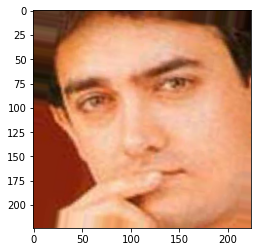

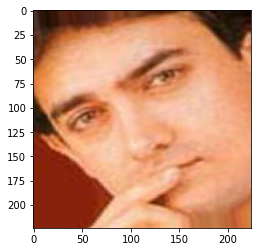

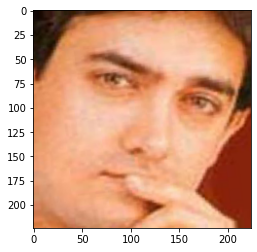

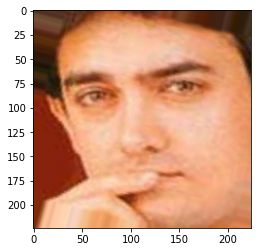

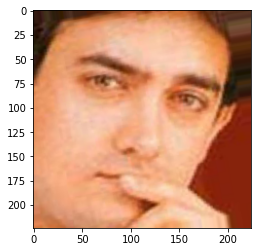

In [ ]:
# This is module with image preprocessing utilities
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_dir_aamir, fname) for fname in os.listdir(train_dir_aamir)]

# We pick one image to "augment"
img_path = fnames[4]

# Read the image and resize it
img = image.load_img(img_path, target_size=(224, 224))

# Convert it to a Numpy array with shape (224, 224)
x = image.img_to_array(img)

# Reshape it to (1, 224, 224, 3)
x = x.reshape((1,) + x.shape)
print(x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=2):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break

plt.show()

In [ ]:
from keras.metrics import Precision
from keras import optimizers,metrics,losses

model.compile(optimizer=optimizers.Adam(lr=0.0001,beta_1=0.97,beta_2=0.99), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy',metrics.SparseTopKCategoricalAccuracy(k=2)])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    data_format='channels_first'
    )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(
    data_format='channels_first',
    rescale=1./255)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 224
        target_size=(224,224),
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 3000 images belonging to 33 classes.
Found 761 images belonging to 33 classes.


In [ ]:
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 3, 224, 224)
labels batch shape: (32,)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Train model
callbacks = [EarlyStopping(monitor='val_accuracy', patience=7),
             ModelCheckpoint(filepath='drive/My Drive/Celeb_Recognition/VGGFace_cropped_images.h5', monitor='val_accuracy')]

history = model.fit_generator(
      train_generator,
      steps_per_epoch=75,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=35,callbacks=callbacks)

Epoch 1/200
75/75 [==============================] - 39s 516ms/step - loss: 3.4613 - accuracy: 0.0472 - sparse_top_k_categorical_accuracy: 0.0941 - val_loss: 3.4715 - val_accuracy: 0.0557 - val_sparse_top_k_categorical_accuracy: 0.0872
Epoch 2/200
75/75 [==============================] - 33s 441ms/step - loss: 3.1299 - accuracy: 0.0765 - sparse_top_k_categorical_accuracy: 0.1446 - val_loss: 3.3403 - val_accuracy: 0.0674 - val_sparse_top_k_categorical_accuracy: 0.1366
Epoch 3/200
75/75 [==============================] - 32s 422ms/step - loss: 2.9175 - accuracy: 0.1146 - sparse_top_k_categorical_accuracy: 0.2150 - val_loss: 3.2046 - val_accuracy: 0.0859 - val_sparse_top_k_categorical_accuracy: 0.1673
Epoch 4/200
75/75 [==============================] - 32s 429ms/step - loss: 2.7614 - accuracy: 0.1568 - sparse_top_k_categorical_accuracy: 0.2663 - val_loss: 3.0558 - val_accuracy: 0.1231 - val_sparse_top_k_categorical_accuracy: 0.2183
Epoch 5/200
75/75 [==============================] - 29s

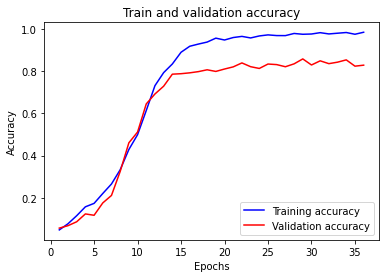

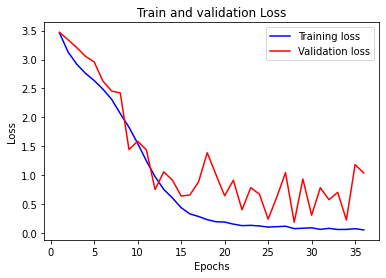

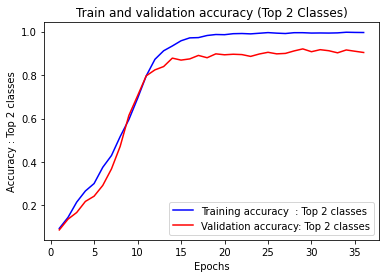

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

sparse_top_k_categorical_accuracy=history.history['sparse_top_k_categorical_accuracy']
val_sparse_top_k_categorical_accuracy=history.history['val_sparse_top_k_categorical_accuracy']

plt.figure(0)
_=plt.plot(epochs, accuracy, 'b', label='Training accuracy')
_=plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.figure(1)
_=plt.plot(epochs, loss, 'b', label='Training loss')
_=plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(2)
_=plt.plot(epochs, sparse_top_k_categorical_accuracy, 'b', label='Training accuracy  : Top 2 classes')
_=plt.plot(epochs, val_sparse_top_k_categorical_accuracy, 'r', label='Validation accuracy: Top 2 classes')
plt.title('Train and validation accuracy (Top 2 Classes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy : Top 2 classes')
plt.legend()

plt.show()

In [ ]:
person_rep=dict()
path=r'data_crop/data/train'
person_folders=os.listdir(path)
person_folders.sort()

for i,person in enumerate(person_folders):
  person_rep[i]=person  

In [ ]:
person_rep

{0: 'Aamir_Khan',
 1: 'Abhay_Deol',
 2: 'Abhishek_Bachchan',
 3: 'Aftab_Shivdasani',
 4: 'Aishwarya_Rai',
 5: 'Ajay_Devgn',
 6: 'Akshay_Kumar',
 7: 'Akshaye_Khanna',
 8: 'Alia_Bhatt',
 9: 'Ameesha_Patel',
 10: 'Amitabh_Bachchan',
 11: 'Amrita_Rao',
 12: 'Amy_Jackson',
 13: 'Anil_Kapoor',
 14: 'Anushka_Sharma',
 15: 'Anushka_Shetty',
 16: 'Arjun_Kapoor',
 17: 'Arjun_Rampal',
 18: 'Arshad_Warsi',
 19: 'Asin',
 20: 'Ayushmann_Khurrana',
 21: 'Bhumi_Pednekar',
 22: 'Bipasha_Basu',
 23: 'Bobby_Deol',
 24: 'Deepika_Padukone',
 25: 'Disha_Patani',
 26: 'Emraan_Hashmi',
 27: 'Esha_Gupta',
 28: 'Farhan_Akhtar',
 29: 'Govinda',
 30: 'Hrithik_Roshan',
 31: 'Huma_Qureshi',
 32: 'Ileana_D╬ô├ç├ûCruz'}

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_first'
    )

In [ ]:
#Function to predict uncropped images
def predict_uncropped(random_filename='data_crop/data/Test/AjayDevgn.jpg'):
  from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
  K.set_image_data_format('channels_last')
  img_org = image.load_img(random_filename)
  img=extract_face(random_filename)
  x=img_to_array(img)

  print("\tOriginal Image: ")
  plt.imshow(img_org)
  plt.show()

  print("\tCropped Image: ")
  plt.imshow(img)
  plt.show()  

  #print(x.shape)
  x=np.transpose(x,(2,0,1))
  #print(x.shape)
  x=x.reshape((1,) + (3,224,224))
  print("Best matches: ")
  prob=model.predict_generator(test_datagen.flow(x, batch_size=1),steps=1)[0]
  print(person_rep[prob.argsort()[-3:][::-1][0]]," : ",round(prob[prob.argsort()[-3:][::-1]][0]*100,1),person_rep[prob.argsort()[-3:][::-1][1]]," : ",round(prob[prob.argsort()[-3:][::-1]][1]*100,1),person_rep[prob.argsort()[-3:][::-1][2]]," : ",round(prob[prob.argsort()[-3:][::-1]][2]*100,1))
  print("Expected Prediction : Amitabh_Bachchan")


	Original Image: 


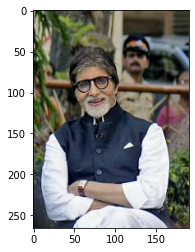

	Cropped Image: 


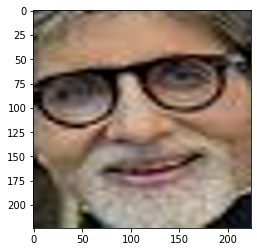

Best matches: 
Amitabh_Bachchan  :  99.5 Abhishek_Bachchan  :  0.0 Arjun_Rampal  :  0.0
Expected Prediction : Amitabh_Bachchan


In [ ]:
random_filename='data_crop/data/Test/Amithab.jfif'
img = image.load_img(random_filename, target_size=(224, 224))
#Exectute function
predict_uncropped(random_filename)

In [ ]:
#Function to predict cropped images
def predict_cropped(random_cropped):
  from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

  img = image.load_img(random_cropped, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.reshape(img,[224,224,3])/255

  print("Original Image: ")
  plt.imshow(x)
  plt.show()

  x=np.transpose(x,(2,0,1))
  x = x.reshape((1,) + x.shape)

  prob=model.predict_proba(x)[0]
  model_class=model.predict_classes(x)
  print(person_rep[prob.argsort()[-3:][::-1][0]]," : ",round(prob[prob.argsort()[-3:][::-1]][0]*100,1),person_rep[prob.argsort()[-3:][::-1][1]]," : ",round(prob[prob.argsort()[-3:][::-1]][1]*100,1),person_rep[prob.argsort()[-3:][::-1][2]]," : ",round(prob[prob.argsort()[-3:][::-1]][2]*100,1))

Original Image: 


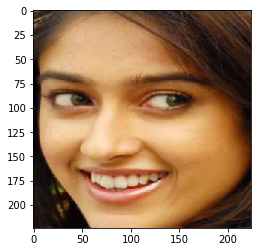

Ileana_D╬ô├ç├ûCruz  :  91.4 Bhumi_Pednekar  :  0.0 Aishwarya_Rai  :  0.0


In [ ]:
random_cropped='data_crop/data/train/Ileana_D╬ô├ç├ûCruz/10.jpg'
predict_cropped(random_cropped)